<center>
<img src="https://raw.githubusercontent.com/PinkWink/DataScience/master/img/title.jpg" width="200" height="200"><br>
</center>

# 8장 - 자연어 처리 시작하기 


자연어 처리는 데이터 분석이 인기를 끌고 있는 요즘 이론적 배경에 대한 이해는 부족하더라도 자연어 처리 모듈의 일부 기능을 사용하는 빈도가 조금씩 많아지고 있다. 자연어 처리 전문가가 아니더라도 웹 데이터를 다루다 보면 정형화된 데이터에서 단순 텍스트 분석등의 역할에 대한 니즈가 있다.

## 8-1 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

한글 자연어 처리를 파이썬으로 하는 것을 도와주는 모둘은 Lucy Park 이라는 분이 개발한 KoNLPy 모듈이 필수이다.

## 8-2 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

먼저 꼬꼬마 모듈을 사용할 수 있게 한다.

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

마침표가 없어도 위와 같이 두 개의 문장으로 구분한다.

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

명사(nouns) 분석도 수행한다.

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

형태소(pos) 분석도 수행한다. 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다. 그래서 최소한의 의미 단위인 형태소로 언어를 분석하는 것이 일반적이다.

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

이번엔 한나눔을 사용해 보자.

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

한나눔 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져온다.

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

한나눔의 형태소 분석 결과이다.

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

이번엔 트위터 분석이다.

In [9]:
from konlpy.tag import Twitter
t = Twitter()

/home/jaeyoon89/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

역시 미세한 차이를 가지고 있다.

## 8-3 워드 클라우드

워드 클라우드는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 도움을 준다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇 가지 있지만 여기서는 그중 하나를 살펴 보겠다.

In [42]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

먼저 필요한 모듈을 임포트 한다. 그리고 이상한 나라의 엘리스 영문 버전을 다운 받고 읽어오자. 그리고 앨리스 그림도 저장한다.
- 데이터 출처 : [파이썬으로 데이터 주무르기 github](https://github.com/PinkWink/DataScience)

In [44]:
text = open('/home/jaeyoon89/DataScience/data/09. alice.txt').read()
alice_mask = np.array(Image.open('/home/jaeyoon89/DataScience/data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

앨리스 소설에는 said 라는 단어가 많이 등장하는 것 같다. 이 단어는 카운트에서 제거하도록 하고 있다.

In [45]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    re('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')
        
%matplotlib inline

Unknown system... sorry~~~~


한글 폰트를 설정해 준다.

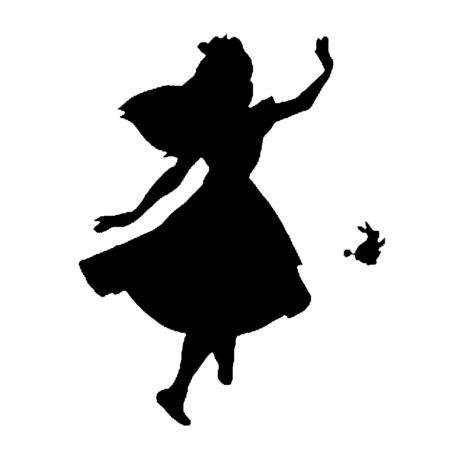

In [46]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

이제 문서 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공하니 그것을 사용해 최빈 단어를 찾아보자.

In [47]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

위는 그 결과이다. Alice가 가장 많이 등장했다.

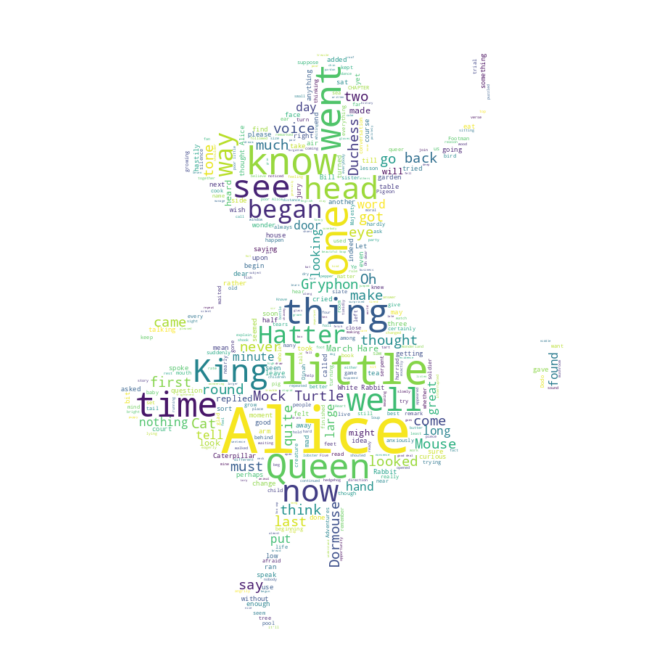

In [49]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

이번엔 스타워즈의 A New Hope 텍스트이다.

In [51]:
text = open('/home/jaeyoon89/DataScience/data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('/home/jaeyoon89/DataScience/data/09. stormtrooper_mask.png'))

여기서도 특수하게 처리해야 할 단어를 처리한다.

In [52]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

그리고 워드 클라우드를 준비한다.

In [53]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

이번엔 앨리스와는 약간 달리 색상 전체를 회색으로 채우도록 함수를 하나 만들자.

In [54]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

그리고 그려보자.

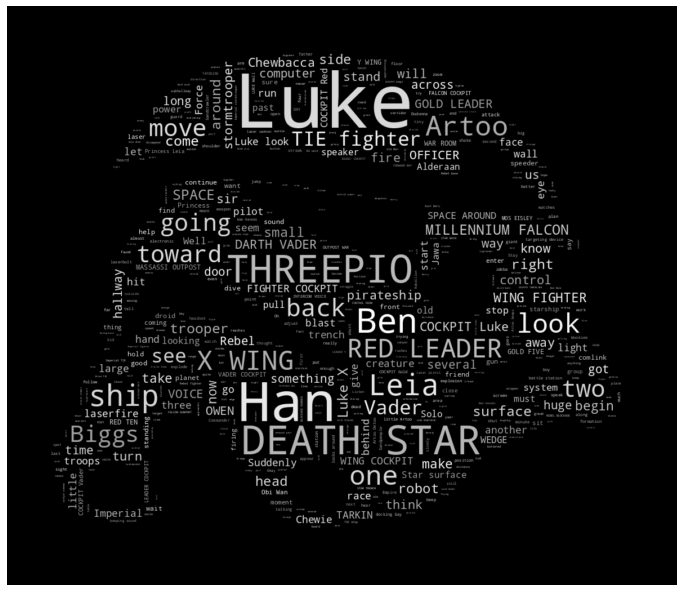

In [55]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

위와 같은 출력을 얻을 수 있다. 회색 톤의 색상과 아주 잘 어울린다. 문서의 성격과 어울리는 그림에 워드 클라우드를 적용하면 꽤 좋은 효과를 얻을 수 있다.

## 8-4 육아 휴직 관련 법안에 대한 분석

이번엔 KoNLPy가 내장하고 있는 법률 문서중 하나를 가지고 기초적인 분석을 해보는 튜토리얼을 아주 미세한 부분 일부를 수정해서 학습해보자.

In [56]:
import nltk

In [58]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

먼저 nltk를 임포트하고 KoNLPy의 내부문서 중 육아휴직 관련 법안 제 1809890호를 읽는다. 

In [59]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

이 문서를 Twitter 분석기로 명사 분석을 해보자.

In [64]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

그리고 수집된 단어의 횟수(len(ko.tokens))와 고유한 횟수 (len(set(ko.tokens))를 확인한다.

In [66]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

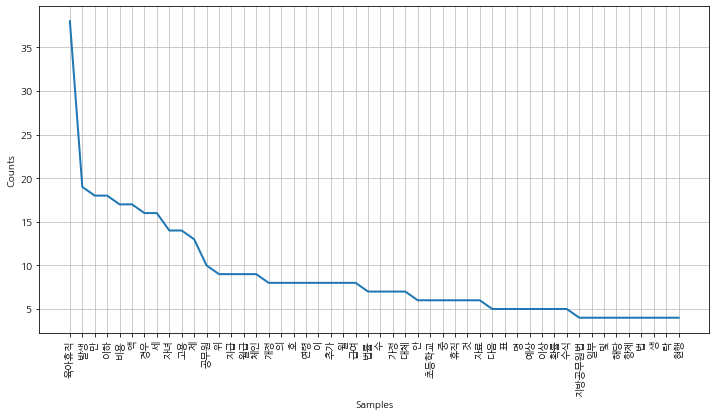

In [67]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

많이 등장한 순으로 plot 해볼 수 있다. 육아 휴직이란 단어가 많이 등장하고 약간 의미없는 단어도 보인다. 한글은 영어와 달리 stopwords를 지정하기가 쉽지 않다. 그래서 case-by-case로 지정해보자.

In [77]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

그리고 난 후 다시 그려보자.

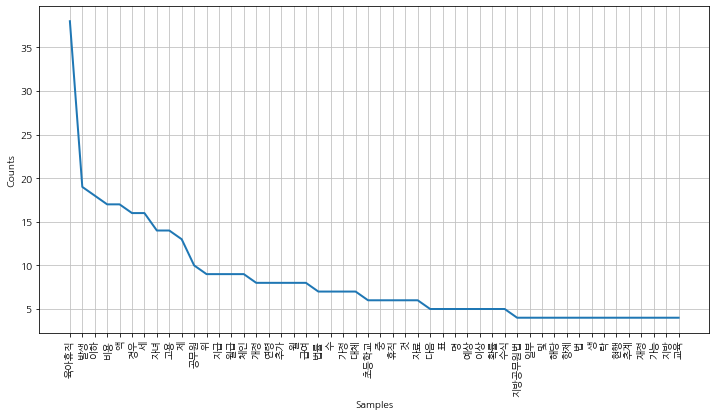

In [78]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [79]:
ko.count('초등학교')

6

어떤 문서가 몇 번 언급되었는지 확인할 수 있다.

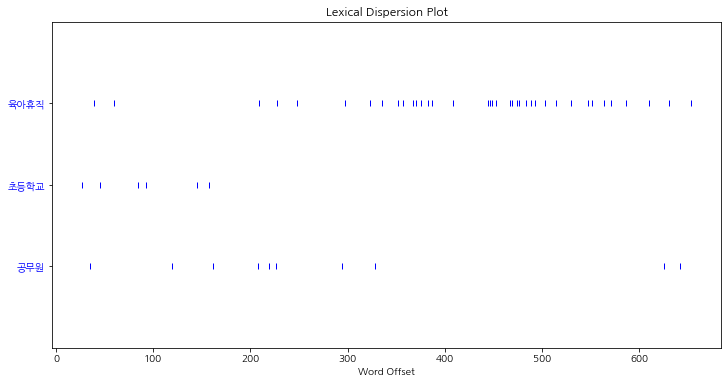

In [80]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])

또한 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있다.

In [81]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


원하는 단어의 주변부 단어까지 같이 확인할 수 있다. 또 문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 알 수 있다.

In [85]:
# nltk
# nltk.download('stopwords')
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


그리고 앞 절에서 학습한 워드 클라우드를 적용해 보자.

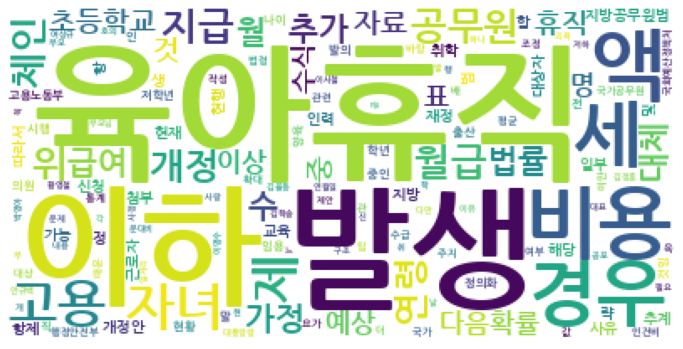

In [86]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path= '/usr/share/fonts/NanumFont/NanumGothicBold.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 8-5 Naive Bayes Classifier의 이해 - 영문

정말 심플한 분류기가 있다. 지도학습의 한 종류이면서 두 사건을 서로 독립이라고 가정하고 각각의 조건부확률을 어떻게 한다는 개념이지만 이 책에선 예제를 통해 이 분류기의 특성을 확인하고 간편하게 사용해보도록 하자.

예를 들어 지도학습이기 때문에 긍정(pos), 부정(neg)라는 태그가 있다. i like you는 긍정이지만, you like me는 부정이다. 이 두문장만 보면 i가 등장할 때는 긍정이다. like는 판단 못한다.

In [87]:
from nltk.tokenize import word_tokenize
import nltk

일단 필요한 모듈을 가져온 다음 연습용 데이터 4개의 문장만으로 입력해보자.

In [88]:
train =[('i like you', 'pos'),
       ('i hate you', 'neg'),
       ('you like me', 'neg'),
       ('i like her', 'pos')]

그리고 위 코드의 train 문장에서 사용된 전체 단어를 찾는다.

In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jaeyoon89/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [91]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

위 결과를 너무 작은 수의 단어이지만 말뭉치라고 하자.

In [92]:
t = [({word : (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'hate': False,
   'i': True,
   'her': False,
   'me': False,
   'like': True,
   'you': True},
  'pos'),
 ({'hate': True,
   'i': True,
   'her': False,
   'me': False,
   'like': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'i': False,
   'her': False,
   'me': True,
   'like': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'i': True,
   'her': True,
   'me': False,
   'like': True,
   'you': False},
  'pos')]

그리고 그 말뭉치를 기준으로 train 문장에 속한 단어인지 아닌지를 기록한다.

이제 이를 이용해서 Naive Bayes 분류기를 동작시키자.

In [93]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


이 코드의 결과를 이해해 보면 Train 문장에 붙은 긍정/부정 태그를 이용하여 분류한 결과 'hate'라는 단어가 없을 때(False) 긍정일 비율이 1.7:1 이라는 것이다.

이번엔 테스트 문장을 'i like MeRui'로 만들어 분류기를 통과시켜보자.

In [94]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'hate': False,
 'i': True,
 'her': False,
 'me': False,
 'like': True,
 'you': False}

In [96]:
classifier.classify(test_sent_features)

'pos'

pos 하다는 결과가 나왔다. 굉장히 naive 하지만 정말 잘 동작한다고 평가받는 것이 Naive Bayes Classifier 이다.

## 8-6 Naive Bayes Classifier의 이해 - 한글


In [97]:
from konlpy.tag import Twitter

In [98]:
pos_tagger = Twitter()

이제 한글로도 적용 시키자. 하지만 한글에서는 형태소 분석을 통해야 한다. 일단 형태소 분석을 하지 않으면 어떻게 되는지 확인해 보자.

In [100]:
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
        ('메리는 이쁜 고양이야', 'pos'),
        ('난 마치고 메리랑 놀거야', 'pos')]

이 문장을 가지고 말뭉치를 만들자.

In [101]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

벌써 '고양이도'와 '고양이야', '메리가'와 '메리는'이 다른 단어로 잡힌 것을 볼 수 있다.

In [102]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t 

[({'수업이': False,
   '이쁜': False,
   '메리가': True,
   '메리랑': False,
   '고양이야': False,
   '고양이도': False,
   '마치고': False,
   '난': False,
   '놀거야': False,
   '지루해': False,
   '좋아': True,
   '메리는': False},
  'pos'),
 ({'수업이': False,
   '이쁜': False,
   '메리가': False,
   '메리랑': False,
   '고양이야': False,
   '고양이도': True,
   '마치고': False,
   '난': False,
   '놀거야': False,
   '지루해': False,
   '좋아': True,
   '메리는': False},
  'pos'),
 ({'수업이': True,
   '이쁜': False,
   '메리가': False,
   '메리랑': False,
   '고양이야': False,
   '고양이도': False,
   '마치고': False,
   '난': True,
   '놀거야': False,
   '지루해': True,
   '좋아': False,
   '메리는': False},
  'neg'),
 ({'수업이': False,
   '이쁜': True,
   '메리가': False,
   '메리랑': False,
   '고양이야': True,
   '고양이도': False,
   '마치고': False,
   '난': False,
   '놀거야': False,
   '지루해': False,
   '좋아': False,
   '메리는': True},
  'pos'),
 ({'수업이': False,
   '이쁜': False,
   '메리가': False,
   '메리랑': True,
   '고양이야': False,
   '고양이도': False,
   '마치고': True,
   '난': True,
   '놀거야': True,
   '지루해': 

동일 과정을 거친 후 만들어진 분류기의 동작을 장담하기 어렵다.

In [103]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [108]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

위 문장은 긍정적 결과가 나와야 할 것 같은데 적용해 보자.

In [109]:
test_sent_features = {word.lower():
                                 (word in word_tokenize(test_sentence.lower()))
                                 for word in all_words}

test_sent_features

{'수업이': True,
 '이쁜': False,
 '메리가': False,
 '메리랑': True,
 '고양이야': False,
 '고양이도': False,
 '마치고': False,
 '난': True,
 '놀거야': True,
 '지루해': False,
 '좋아': False,
 '메리는': False}

In [110]:
classifier.classify(test_sent_features)

'neg'

위와 같이 부정적 이라고 나타난다. 결국 한글을 다룰 때는 형태소 분석이 필요하다.

In [111]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

8-1절에서 소개한 Lucy Park님에 따르면 위 함수 처럼 태그를 붙여주는 것이 유리하다고 한다.

In [112]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [113]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

그리고 위처럼 전체 말뭉치도 만들었다.

In [114]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

말뭉치에 있는 단어가 있는지 아닌지를 구분하는 함수를 만들어서 train 문장에 적용한다. 조사인지 명사인지 구분이 잘 되어 있어 판독하기 좋다.

In [115]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

이제 분류기를 동작시켜 보자.

In [116]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

그리고 나서 형태소 분석을 안 했을 때 부정되었던 문장을 다시 가지고 테스트하자.

In [117]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

그리고 역시 동일하게 형태소를 분석하자.

In [119]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [120]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

이제 결과를 보자.

In [121]:
classifier.classify(test_sent_features)

'pos'

의도한 대로 긍정의 의미가 잘 드러났다.

## 8-7 문장의 유사도 측정하기

앞 절에서 간략하게 분류에 대해 이야기 했다. 그러나 지도학습이어서 미리 정답을 알고 있어야 한다. 이번 절에서는 많은 문장 혹은 문서들 중에서 유사한 문장을 찾아내는 방법에 대해 설명하겠다. 만약 어떤 문장을 벡터로 표현할 수 있다면 벡터 간 거리를 구하는 방법으로 정말 손쉽게 해결 할 수 있다.

In [204]:
from sklearn.feature_extraction.text import CountVectorizer

In [205]:
vectorizer = CountVectorizer(min_df = 1)

먼저 사이킷런에서 텍스트의 특징을 추출하는 모듈에서 CountVectorizer라는 함수를 임포트한다.

In [206]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
           '메리는 공원에서 산책하고 노는 것을 싫어해요',
           '메리는 공원에서 노는 것도 싫어해요. 이상해요',
           '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

그리고 유사한 문장을 연습용으로 사용해보자.

In [207]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

이제 좀 더 한글 문장에 대한 벡터화를 합리적으로 진행해 보자.

In [208]:
from konlpy.tag import Twitter
t = Twitter()

KoNLPy의 Twitter를 이용해 형태소 분석을 한 결과를 token으로 두자.

In [209]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

앞의 결과와는 달리 형태소 분석을 수행한 결과에서는 '메리랑','메리는'을 '메리'로 분리해서 같은 단어로 보는 것을 볼 수 있다.
위 처럼 형태소 분석을 한 후 띄어쓰기로 구분하고 그것 자체를 하나의 문장으로 만들어서 사이킷런의 vectorizer 함수에서 사용하기 편하게 편집한다.

In [210]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

그리고 feature를 찾도록 한다.

In [211]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

이렇게 잡은 feature를 확인해보기 위해 다음과 같이 작성한다.

In [212]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

그리고 리스트를 받고 다시 다음과 같이 벡터화한다.

In [213]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]])

이제 새로운 문장이 있으면 그 문장을 동일한 과정으로 벡터화해서 각 벡터들 사이의 거리를 구하면 될 것이다.

In [214]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

위의 새로운 문장도 동일한 과정을 거쳐 벡터화시키자.

In [215]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

이제 새로운 문장(new_post_vec)과 비교해야 할 문장(contents)들 각각에 대해 거리를 구하면 된다.

In [216]:
import scipy as sp
def dist_raw(v1,v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

그렇게 하기 위해 두 벡터의 차를 구하고 난 결과의 norm을 구하는 함수를 만들었다.

In [217]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


결과는 위와 같다.


In [218]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('-->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
--> 메리는 공원에서 산책하고 노는 것을 싫어해요


위 처럼 '메리랑 공원에서 산책하고 놀고 싶어요' 라는 문장과 주어진 4개의 문장 중에서 가장 흡사한 문장으로 '메리는 공원에서 산책하고 노는것을 싫어해요'가 잡혔다. 문장의 의미는 반대이지만 소속된 단어들의 조합을 보면 타당해 보인다.

In [219]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())

print('-------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
-------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


벡터화된 결과를 한 번 보면 4개의 contents 변수에 저장된 문장과 새로운 문장이 형태소 분석 후 벡터화된 결과를 확인할 수 있다. 이제 거리를 구해보자.

In [220]:
def dist_norm(v1,v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

각 벡터의 norm을 나눠준 후 거리를 구하도록 함수를 만든다.

In [221]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f     : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28     : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42     : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89     : 메리는 공원에서 노는 것도 싫어해요. 이상해요
== Post 3 with dist=1.30     : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


거리를 구한 결과가 조금 달라져 있는 것을 알 수 있다. 그러나 가장 가까운 문장을 찾는 것에 대한 결과는 크게 다르지 않다.

In [222]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


여전히 같은 결과가 나온다. 이제 tfidf 라는 개념을 적용하려 한다. tf와 idf는 텍스트마이닝에서 사용하는 일종의 단어별로 부과하는 가중치 이다. tf는 어떤 단어가 문서내에서 자주 등장할수록 중요도가 높을 것으로 보는 것이다. 그리고 idf는 비교하는 모든 문서에 만약 같은 단어가 있다면 이 단어는 핵심 어휘일지는 모르지만 문서 간의 비교에서는 중요한 단어가 아니라는 뜻으로 보는 것이다.

In [223]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

그 원리로 tfidf 함수를 만들었다.

In [224]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [225]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

0.0
0.27031007207210955
0.0
0.13515503603605478
0.13515503603605478
0.3662040962227032


/home/jaeyoon89/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  This is separate from the ipykernel package so we can avoid doing imports until


위의 연습용 코드를 보면 모든 문장에 a가 있기 때문에 idf의 결과는 0 이다. 이 두 값을 곱한 것을 tfidf라고 하는 함수로 수정해서 사용하면 되지만 사이킷런의 TfidfVectorizer를 임포트해서 사용하면 된다.

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

CounterVectorizer를 임포트할 때와 동일하게 임포트한다.

In [227]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

역시 동일하게 contents 문장들을 다듬자.

In [228]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

이제 만들어진 말뭉치를 확인해보면 위와 같다.

In [229]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + '  ' + word
        
    new_post_for_vectorize.append(sentence)
        
new_post_for_vectorize

['  근처  공원  에  메리  랑  놀러  가고  싶네요']

계속해서 사용하고 있는 테스트용 문장을 비교해보자.

In [230]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

다른 결과와 비교하면 재밌는 결과를 얻을 수 있다.

In [231]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<  best_dist:
        best_dist = d
        best_i= i
        
print("Best post is %i, dist=%.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist=0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 8-8 여자친구 선물 고르기

이번엔 네이버의 지식인에서 여자친구 선물이라는 주제로 검색을 하고 그 검색 결과로 지금까지 학습한 몇몇 개념을 사용하려고 한다.

In [232]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    re('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [243]:
plt.rcParams['axes.unicode_minus'] = False
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [257]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('div')

크롬 개발자 도구로 질문에 대한 답변이 위치한 곳의 태그를 찾아보면 div라는 것을 알 수 있다.

In [258]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

['',
 ' 메뉴 영역으로 바로가기 본문 영역으로 바로가기 ',
 '      NAVER   검색                  한글 입력기    (function() { var startApplication = function() { var jsUrl = "https://ssl.pstatic.net/sstatic/au/pc/ime/ime_201105.js"; var ime; jQuery("#ke_kbd_btn").on("click", function(){ require([jsUrl], function(IMEKeyboard) { if (ime) { ime.toggle(); return; } ime = new IMEKeyboard({selector: { TOGGLE_BTN: "#ke_kbd_btn", CONTENTS_AREA: "#_nx_kbd", INPUT: "#nx_query" }}).toggle(); }, function () { alert("네트워크 상태가 안 좋아 한영입력기를 불러오지 못했습니다.\\n잠시 후 다시 시도해 주세요."); }); }); }; naver.common.load_js(window.require ? null : naver.common.gv.REQUIRE_JS, startApplication, true, 150); })();   자동완성 레이어     최근검색어  전체삭제       @txt@   @date@. 삭제    검색어 저장 기능이 꺼져 있습니다.설정이 초기화 된다면 도움말을 확인해주세요. 최근 검색어 내역이 없습니다.설정이 초기화 된다면 도움말을 확인해주세요.    도움말    자동저장 끄기           @5@회차 당첨번호  추첨 @13@.지급기한 1년     @6@@7@@8@@9@@10@@11@@12@       @14@  @txt@@currency@  @8@(@9@%)    @6@원        @txt@  @7@, @message@     @7@ @8@°         @txt@  @5@    바로가기    

In [259]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('div')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

/home/jaeyoon89/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/100 [00:00<?, ?it/s]

In [260]:
present_candi_text

['',
 ' 메뉴 영역으로 바로가기 본문 영역으로 바로가기 ',
 '      NAVER   검색                  한글 입력기    (function() { var startApplication = function() { var jsUrl = "https://ssl.pstatic.net/sstatic/au/pc/ime/ime_201105.js"; var ime; jQuery("#ke_kbd_btn").on("click", function(){ require([jsUrl], function(IMEKeyboard) { if (ime) { ime.toggle(); return; } ime = new IMEKeyboard({selector: { TOGGLE_BTN: "#ke_kbd_btn", CONTENTS_AREA: "#_nx_kbd", INPUT: "#nx_query" }}).toggle(); }, function () { alert("네트워크 상태가 안 좋아 한영입력기를 불러오지 못했습니다.\\n잠시 후 다시 시도해 주세요."); }); }); }; naver.common.load_js(window.require ? null : naver.common.gv.REQUIRE_JS, startApplication, true, 150); })();   자동완성 레이어     최근검색어  전체삭제       @txt@   @date@. 삭제    검색어 저장 기능이 꺼져 있습니다.설정이 초기화 된다면 도움말을 확인해주세요. 최근 검색어 내역이 없습니다.설정이 초기화 된다면 도움말을 확인해주세요.    도움말    자동저장 끄기           @5@회차 당첨번호  추첨 @13@.지급기한 1년     @6@@7@@8@@9@@10@@11@@12@       @14@  @txt@@currency@  @8@(@9@%)    @6@원        @txt@  @7@, @message@     @7@ @8@°         @txt@  @5@    바로가기    

아주 많은 문장이 저장 되어 있다. 이제 사용할 도구를 임포트하자.

In [261]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

/home/jaeyoon89/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [262]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

하나의 글로 present_text라는 변수에 저장한다.

In [263]:
tokens_ko = t.morphs(present_text)
tokens_ko

['\n ',
 '메뉴',
 '영역',
 '으로',
 '바로가기',
 '본문',
 '영역',
 '으로',
 '바로가기',
 'NAVER',
 '검색',
 '한글',
 '입력기',
 '(',
 'function',
 '()',
 '{',
 'var',
 'startApplication',
 '=',
 'function',
 '()',
 '{',
 'var',
 'jsUrl',
 '=',
 '"https://ssl.pstatic.net/sstatic/au/pc/ime/ime_201105.js',
 '";',
 'var',
 'ime',
 ';',
 'jQuery',
 '(',
 '"#ke_kbd_btn',
 '").',
 'on',
 '("',
 'click',
 '",',
 'function',
 '(){',
 'require',
 '([',
 'jsUrl',
 '],',
 'function',
 '(',
 'IMEKeyboard',
 ')',
 '{',
 'if',
 '(',
 'ime',
 ')',
 '{',
 'ime',
 '.',
 'toggle',
 '();',
 'return',
 ';',
 '}',
 'ime',
 '=',
 'new',
 'IMEKeyboard',
 '({',
 'selector',
 ':',
 '{',
 'TOGGLE',
 '_',
 'BTN',
 ':',
 '"#ke_kbd_btn',
 '",',
 'CONTENTS',
 '_',
 'AREA',
 ':',
 '"#_nx_kbd',
 '",',
 'INPUT',
 ':',
 '"#nx_query',
 '"',
 '}}).',
 'toggle',
 '();',
 '},',
 'function',
 '()',
 '{',
 'alert',
 '("',
 '네트워크',
 '상태',
 '가',
 '안',
 '좋아',
 '한',
 '영',
 '입력기',
 '를',
 '불러오지',
 '못',
 '했습니다',
 '.\\',
 'n',
 '잠시',
 '후',
 '다시',
 '시도',
 '해',


형태소 분석을 마친 단어를 가지고 token을 가져왔다.

In [264]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

901683
1943


토큰으로 모은 단어는 901683개 이지만 중복된 단어를 빼면 1943개이다.

In [265]:
ko = nltk.Text(tokens_ko, name = '여자친구 선물')
ko.vocab().most_common(100)

[('.', 37851),
 ('선물', 21261),
 ('_', 17370),
 ('여자친구', 16966),
 ('(', 11659),
 ('"', 11060),
 ('=', 9513),
 ('상담', 8939),
 ('{', 8784),
 (',', 8252),
 ('추천', 7396),
 (')', 7107),
 ('...', 6680),
 ('var', 6668),
 ('로', 6533),
 (':', 6275),
 (';', 5830),
 ('이', 5641),
 ('에', 5640),
 ('function', 5286),
 ('@', 5061),
 ('가', 4969),
 ('을', 4763),
 ('?', 4712),
 ('저장', 4431),
 ('}', 4356),
 ('!', 4300),
 ('Q', 4144),
 ('Keep', 3774),
 ('별', 3628),
 ('("', 3564),
 ('()', 3400),
 ('+', 3338),
 ('":', 3276),
 ('요', 3109),
 ('한', 3072),
 ('은', 3054),
 ('좀', 3044),
 ('점', 2915),
 ('대', 2894),
 ('",', 2870),
 ('의', 2824),
 ('-', 2768),
 ('/*', 2751),
 ('MBTI', 2751),
 ('="', 2646),
 ('if', 2637),
 ('~', 2633),
 ('*/', 2562),
 ('1', 2446),
 ('를', 2421),
 ('require', 2352),
 ('/', 2332),
 ('바로가기', 2328),
 ('자동', 2310),
 ('가능', 2310),
 (');', 2264),
 ('e', 2183),
 ('화장품', 2183),
 ('이전', 2176),
 ('다음', 2176),
 ('완성', 2100),
 ('window', 2098),
 ('\n\n\n\n', 2076),
 ('도', 2046),
 ('하기', 2034),
 ('20', 

그중 가장 많이 사용된 단어를 보면 의미없는 단어들도 보인다. 그래서 그 단어들을 손으로 제거한다.

In [324]:
stop_words = ['적','1:1','@txt','t','자세히','도움말','분','들','class','return','보기','문서',
              '이라','내','심리상담','\n','거','너무','@@','common','관련','\n      ','<','div','>',
              'A','_','(','"','=','상담','{',',','추천',')','...','var','로',':',';','이','에',
              'function','@','가','을','?','저장','}','!','Q','Keep','별','("','()','+','":','요',
              '한','은','좀','점','대','",','의','-','/*','MBTI','="','if','~','*/','1','를','require',
              '/', '바로가기','자동',');','e','이전','다음','완성','window','\n\n\n\n','도','하기',
              '20','으로','..','\n\n\n','});','가능','는','},','제','();','),','js','\n\n','\n  ','cr','");',
              'data','전문가','안녕하세요','option','관리','naver','해주세요','50분','것','수','걸','서비스',
              '부탁드려요','설정','Controller','[','area','닫기','입니다','nx','검색어','광고','gnb','_(','네이버',
              '로그인','};',"',",'.','">','10','ㅠㅠ','({','컨','하나','텍스트','뭐','new','4.8','임상심리사','</','$',
              '이번','하고','n','0','해','정보',"'",'****','주','jQuery','옵션','검사','4.9','k','인','a','")','headerfooter',
              'time','s','params',']','부탁드립니다','안','부탁','만','startApplication','없을까요','날','영','tags','param',
              '.$','player','Element','싶어요','JS','전체','추가','null','9','5.0','아이디','\n\n\n\n\n\n','tab','load','naver.search',
             'context','";']
tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 21261),
 ('여자친구', 16966),
 ('화장품', 2183),
 ('생일', 1889),
 ('여자', 1534),
 ('좋은', 1403),
 ('검색', 1383),
 ('목걸이', 1250),
 ('가격', 1236),
 ('고민', 1213),
 ('지식', 1150),
 ('친구', 1144),
 ('감동', 1134),
 ('집들이', 1120),
 ('센스', 1113),
 ('괜찮은', 996),
 ('특별한', 994),
 ('마음', 961),
 ('부담', 950),
 ('사람', 919),
 ('향수', 919),
 ('디자인', 835),
 ('경락', 825),
 ('구입', 820),
 ('영양', 800),
 ('초기', 798),
 ('레이어', 793),
 ('있습니다', 793),
 ('제공', 792),
 ('뭘', 790),
 ('어떤', 787),
 ('기념일', 786),
 ('돈', 745),
 ('용', 742),
 ('싶은데', 741),
 ('사주고', 740),
 ('저희', 740),
 ('학생', 740),
 ('하는', 729),
 ('\n    ', 725),
 ('소', 724),
 ('할까', 711),
 ('커플', 709),
 ('30', 705),
 ('여친', 705),
 ('합니다', 704),
 ('3', 703),
 ('중', 703),
 ('생각', 700),
 ('150', 693)]

등장 빈도에 따른 빈도수 그래프를 그려보자.

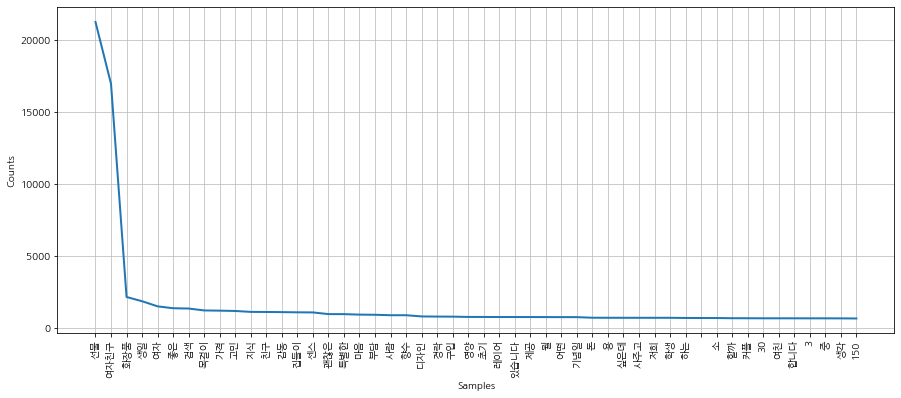

In [325]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [326]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

워드 클라우드를 그리기 위해 필요한 모듈을 import 한다.

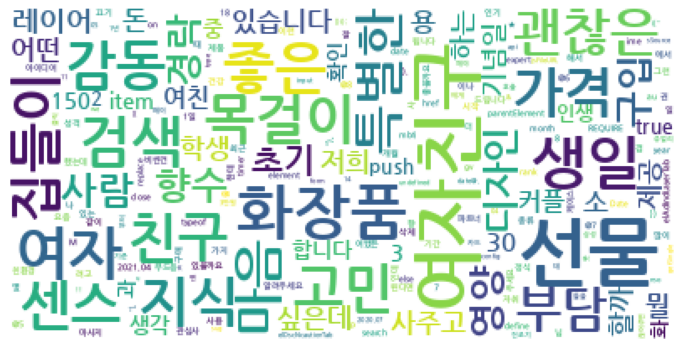

In [327]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path= '/usr/share/fonts/NanumFont/NanumGothicBold.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

이번엔 github에 있는 하트그림으로 마스킹해서 그려보자.
- [파이썬으로 데이터 주무르기 githup](https://github.com/PinkWink/DataScience)

In [328]:
mask = np.array(Image.open('/home/jaeyoon89/DataScience/data/09. heart.jpg'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [329]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path= '/usr/share/fonts/NanumFont/NanumGothicBold.ttf',
                      relative_scaling = 0.1, mask=mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100,).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

이제 그려보자.

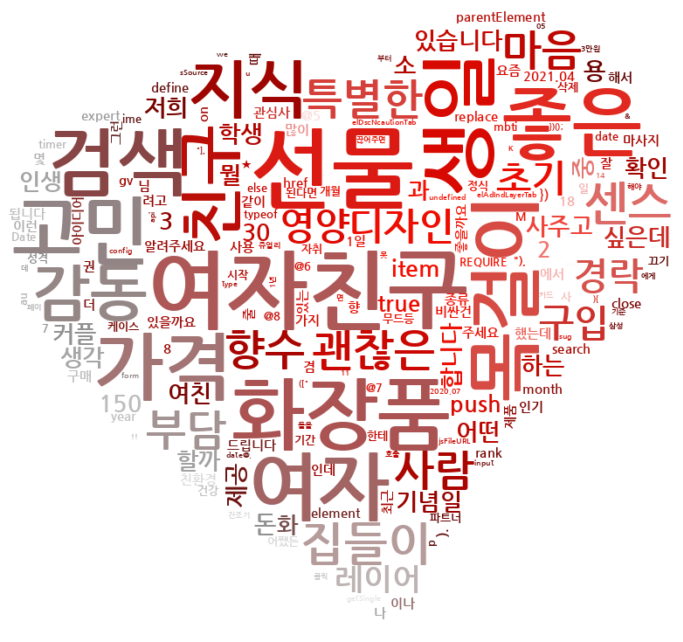

In [330]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

파격적으로 많은 데이터를 다루지 못해서 딱 정답이 나오진 않지만 그래도 나쁘지 않은 결과이다.

출처 : 파이썬으로 데이터 주무르기